<a href="https://colab.research.google.com/github/AbiemwenseMaureenOshobugie/Nigerian-Language/blob/main/nigerian_4lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Layer** - accessing data source

Loading the Data:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import os
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


In [ ]:
# Load the CSV data into a DataFrame
train = pd.read_csv('/content/Train.csv')


In [ ]:
train.head()

,Text,Language
0,Bazuwar ƙwayar a-rungumi-zaki a Najeriya na ta...,hausa
1,Chelsea ta kakkaɓe manyan 'yan wasanta su goma...,hausa
2,Kun san abin da ke jan manyan ƴan ƙwallon duni...,hausa
3,Taɓa Kiɗi Taɓa Karatu 02/07/23 Taɓa Kiɗi Taɓa ...,hausa
4,Ẹ wo àwọn akọ́nimọ̀ọ́gbá tí wọ́n tí fí ọwọ́ òs...,yoruba


Exploratory Data Analysis (EDA):


In [ ]:
# Check the class distribution
class_distribution = train['Language'].value_counts()


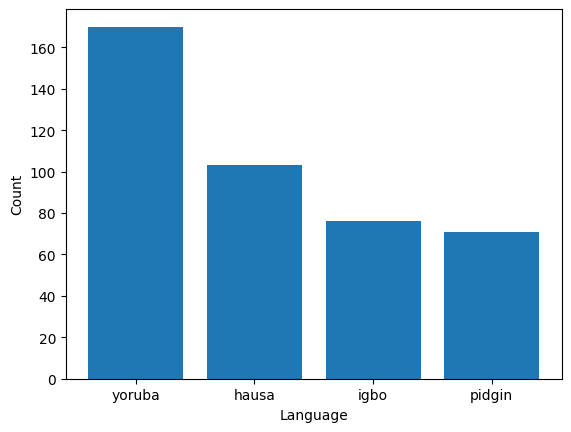

In [ ]:
# Visualize the class distribution
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


In [ ]:
# Analyze the text lengths
train['text_length'] = train['Text'].apply(len)
mean_length = train.groupby('Language')['text_length'].mean()


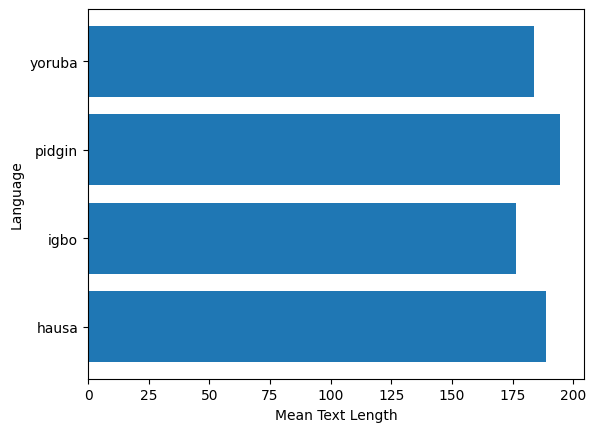

In [ ]:
# Visualize the text length distribution
plt.barh(mean_length.index, mean_length.values)
plt.xlabel('Mean Text Length')
plt.ylabel('Language')
plt.show()


**Feature Layer** - generating feature data [Which should be transparent, reusable and scalable]

Cleaning the Data:

In [ ]:
# Handle missing values (if any)
train = train.dropna()


In [ ]:
# Perform text preprocessing (e.g., removing punctuation, lowercasing, tokenization, stemming/lemmatization)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    text = ' '.join(text)
    return text



In [ ]:
train['clean_text'] = train['Text'].apply(preprocess_text)


In [ ]:
# Encode categorical labels (language) into numerical representations
label_encoder = LabelEncoder()
train['label'] = label_encoder.fit_transform(train['Language'])


**Scoring Layer** - transforming features into predictions

Building the Language Model:


In [ ]:
# Split the data into training and testing sets
X = train['clean_text']
y = train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [ ]:
# Build and train the language model
model = LinearSVC()
model.fit(X_train, y_train)


LinearSVC()

In [ ]:
# Perform prediction using the loaded model
y_pred = model.predict(X_test)

**Evaluation Layer** - Monitoring and comparing [how closely the training predictions match the predictions on live traffic]

In [ ]:
# Evaluate the model on the testing set
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

       hausa       1.00      1.00      1.00        17
        igbo       1.00      1.00      1.00        17
      pidgin       1.00      1.00      1.00        16
      yoruba       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Tuning the Parameters:


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'dual': [False]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best performing model
best_model = grid_search.best_estimator_


Saving the model

In [ ]:
# Get the current working directory
current_dir = os.getcwd()
print("Current Directory:", current_dir)

# Create a dictionary to store the objects
saved_objects = {
    'loaded_model': best_model,
    'vectorizer': vectorizer,
    'label_encoder' : label_encoder
}

# Save the dictionary to a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(saved_objects, f)

Current Directory: /content


In [ ]:
# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

       hausa       1.00      1.00      1.00        17
        igbo       1.00      1.00      1.00        17
      pidgin       1.00      1.00      1.00        16
      yoruba       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Apply the preprocessing steps to the test data

In [ ]:
# Load the test data
test_data = pd.read_csv('/content/Test.csv')

# Handle missing values (if any)
train = train.dropna()

# Perform data cleaning and preprocessing on the test data
test_data['text_preprocessed'] = test_data['Text'].apply(preprocess_text)

# Transform the preprocessed text data using the same vectorizer used during training:
X_test = vectorizer.transform(test_data['text_preprocessed'])

# Make predictions using the trained model
predictions = model.predict(X_test)


In [ ]:
predictions

array([2, 1, 3, 2, 3, 1, 0, 3, 0, 3, 1, 1, 3, 1, 3, 1, 1, 0, 3, 2, 3, 1,
       0, 3, 0, 3, 1, 3, 1, 1, 2, 3, 3, 1, 2, 3, 1, 0, 3, 3, 0, 3, 1, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 0, 0, 3, 3, 3, 3, 2, 0, 1, 1, 2, 3,
       0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 2, 0, 3, 1, 3, 3,
       3, 0, 0, 0, 3, 1, 3, 3, 2, 3, 0, 0, 1, 0, 1, 1, 0, 1, 1, 3, 0, 0,
       2, 2, 2, 3, 3, 3, 3, 3, 2, 0, 3, 3, 0, 1, 2, 3, 3, 1, 3, 1, 3, 3,
       3, 3, 3, 1, 1, 0, 0, 3, 1, 3, 3, 3, 3, 1, 3, 0, 2, 3, 1, 2, 2, 3,
       0, 0, 3, 3, 3, 0, 0, 1, 0, 0, 3, 3, 0, 3, 1, 3, 0, 3, 0, 2, 2, 3,
       0, 3, 1, 3])

Evaluate the model performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score) comparing the predicted labels (predictions) with the actual labels (y_test).


In [ ]:
# Load the test data with label
test_labels = pd.read_csv('/content/test_label.csv')

# Prepare the test labels for evaluation:
y_test = test_labels['Language']

# Convert string labels to numeric representations
y_test_encoded = label_encoder.fit_transform(y_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test_encoded, predictions)
precision = precision_score(y_test_encoded, predictions, average='weighted')
recall = recall_score(y_test_encoded, predictions, average='weighted')
f1 = f1_score(y_test_encoded, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
